# Seaborn Cheat Sheet

* High-level, easy-to-use data visualization library
* All visualizations are created using matplotlib
* Plots are created with a single line of code - a call to a Seaborn plotting function
* [Seaborn API][1] and [User Guide][2]

## Type of Seaborn Plots - Axes vs Grid

* There are two broad types of plots - **Axes** and **Grid**
* Axes plots create a single matplotlib Axes within a matplotlib Figure
* Grid plots create multiple Axes within a Figure
* Most plotting functions fall into the Axes category

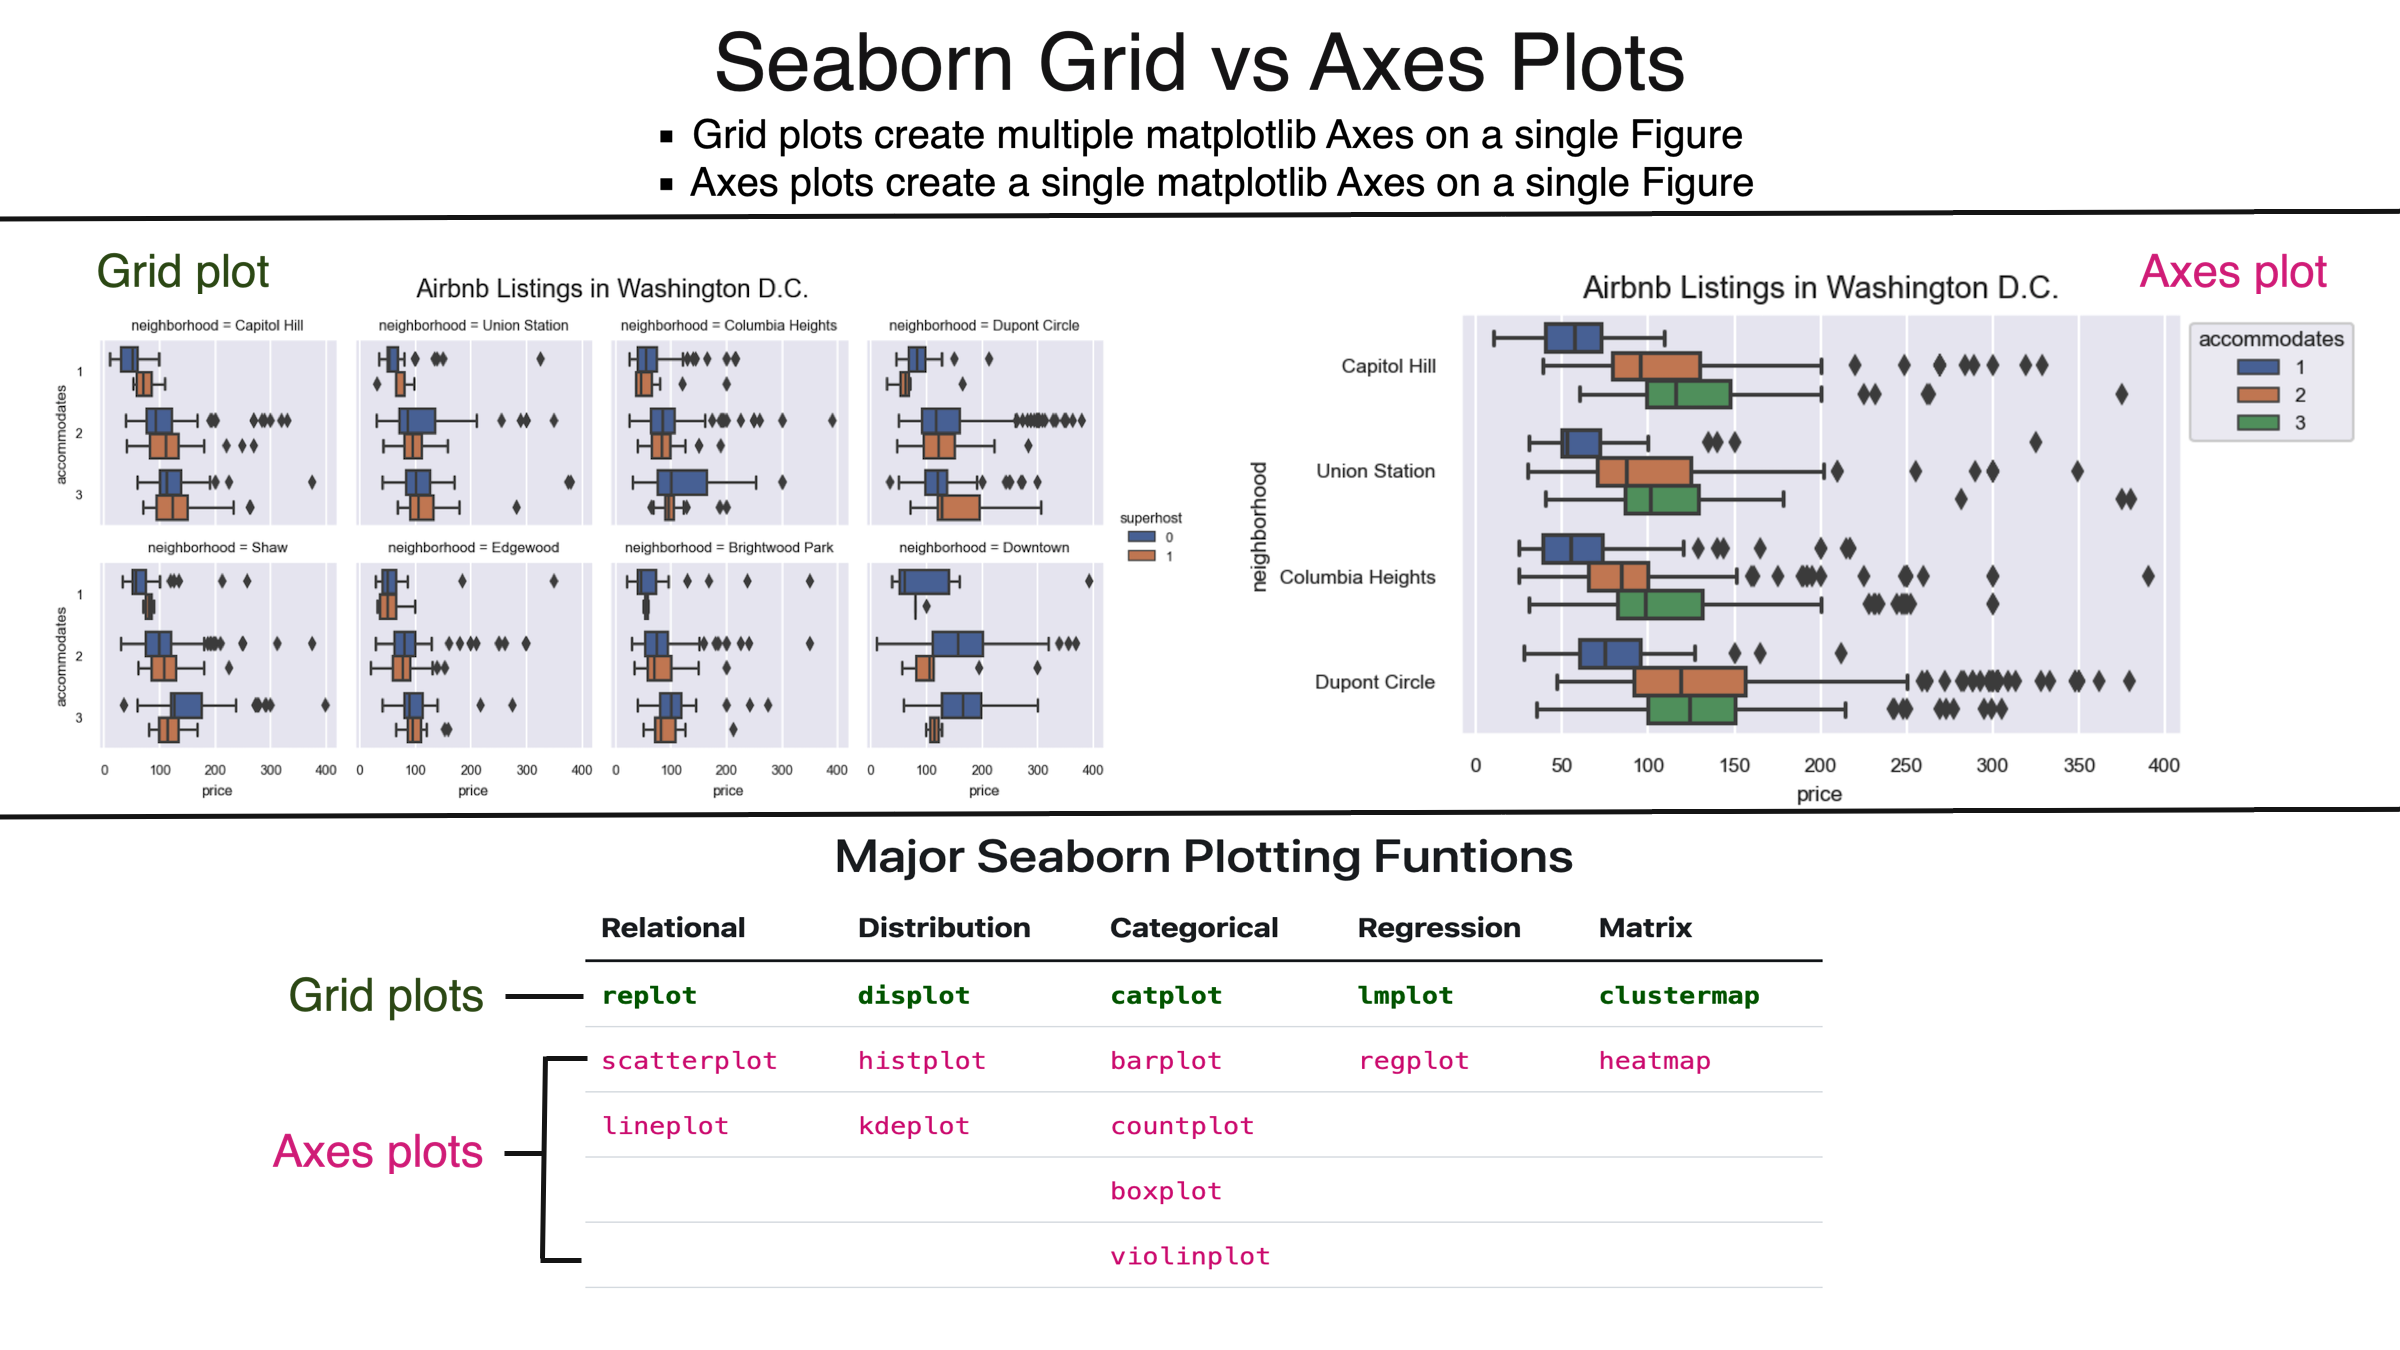

[1]: http://seaborn.pydata.org/api.html
[2]: https://seaborn.pydata.org/tutorial.html

##  Seaborn is tightly integrated with pandas

* All plotting functions contain **`data`** parameter. Set it to pandas DataFrame
* Use **strings** of the column names for the function arguments

### The four common seaborn plotting function parameters - `x`, `y`, `hue`, and `data`

```python
>>> sns.plotting_func(x='col1', data=df)
>>> sns.plotting_func(y='col1', data=df)
>>> sns.plotting_func(x='col1', y='col2', data=df)
>>> sns.plotting_func(x='col1', y='col2', hue='col3', data=df)
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
airbnb = pd.read_csv('../data/airbnb_400.csv')
airbnb.head(3)

,id,neighborhood,room_type,accommodates,bedrooms,price,security_deposit,cleaning_fee,rating,superhost,response_time,acceptance_rate,host_since,last_review,num_reviews,latitude,longitude,minimum_nights,maximum_nights
0,3686,Historic Anacostia,Private room,1,1.0,55,25,25,4.60,0,a few days or more,67%,2008-11-26,2021-08-09,76,38.86339,-76.98889,2,365
1,3943,Edgewood,Private room,2,1.0,71,50,0,4.81,0,NaN,NaN,2008-12-12,2021-09-11,434,38.91195,-77.00456,2,1125
2,4529,Eastland Gardens,Private room,4,1.0,54,25,50,4.66,0,within a few hours,NaN,2008-12-30,2019-07-05,102,38.90585,-76.94469,30,180


## Change aesthetics with `set_theme`

* `sns.set_theme(style='darkgrid', rc={'figure.dpi': 147}, font_scale=0.7)`
     * Use dpi of your monintor

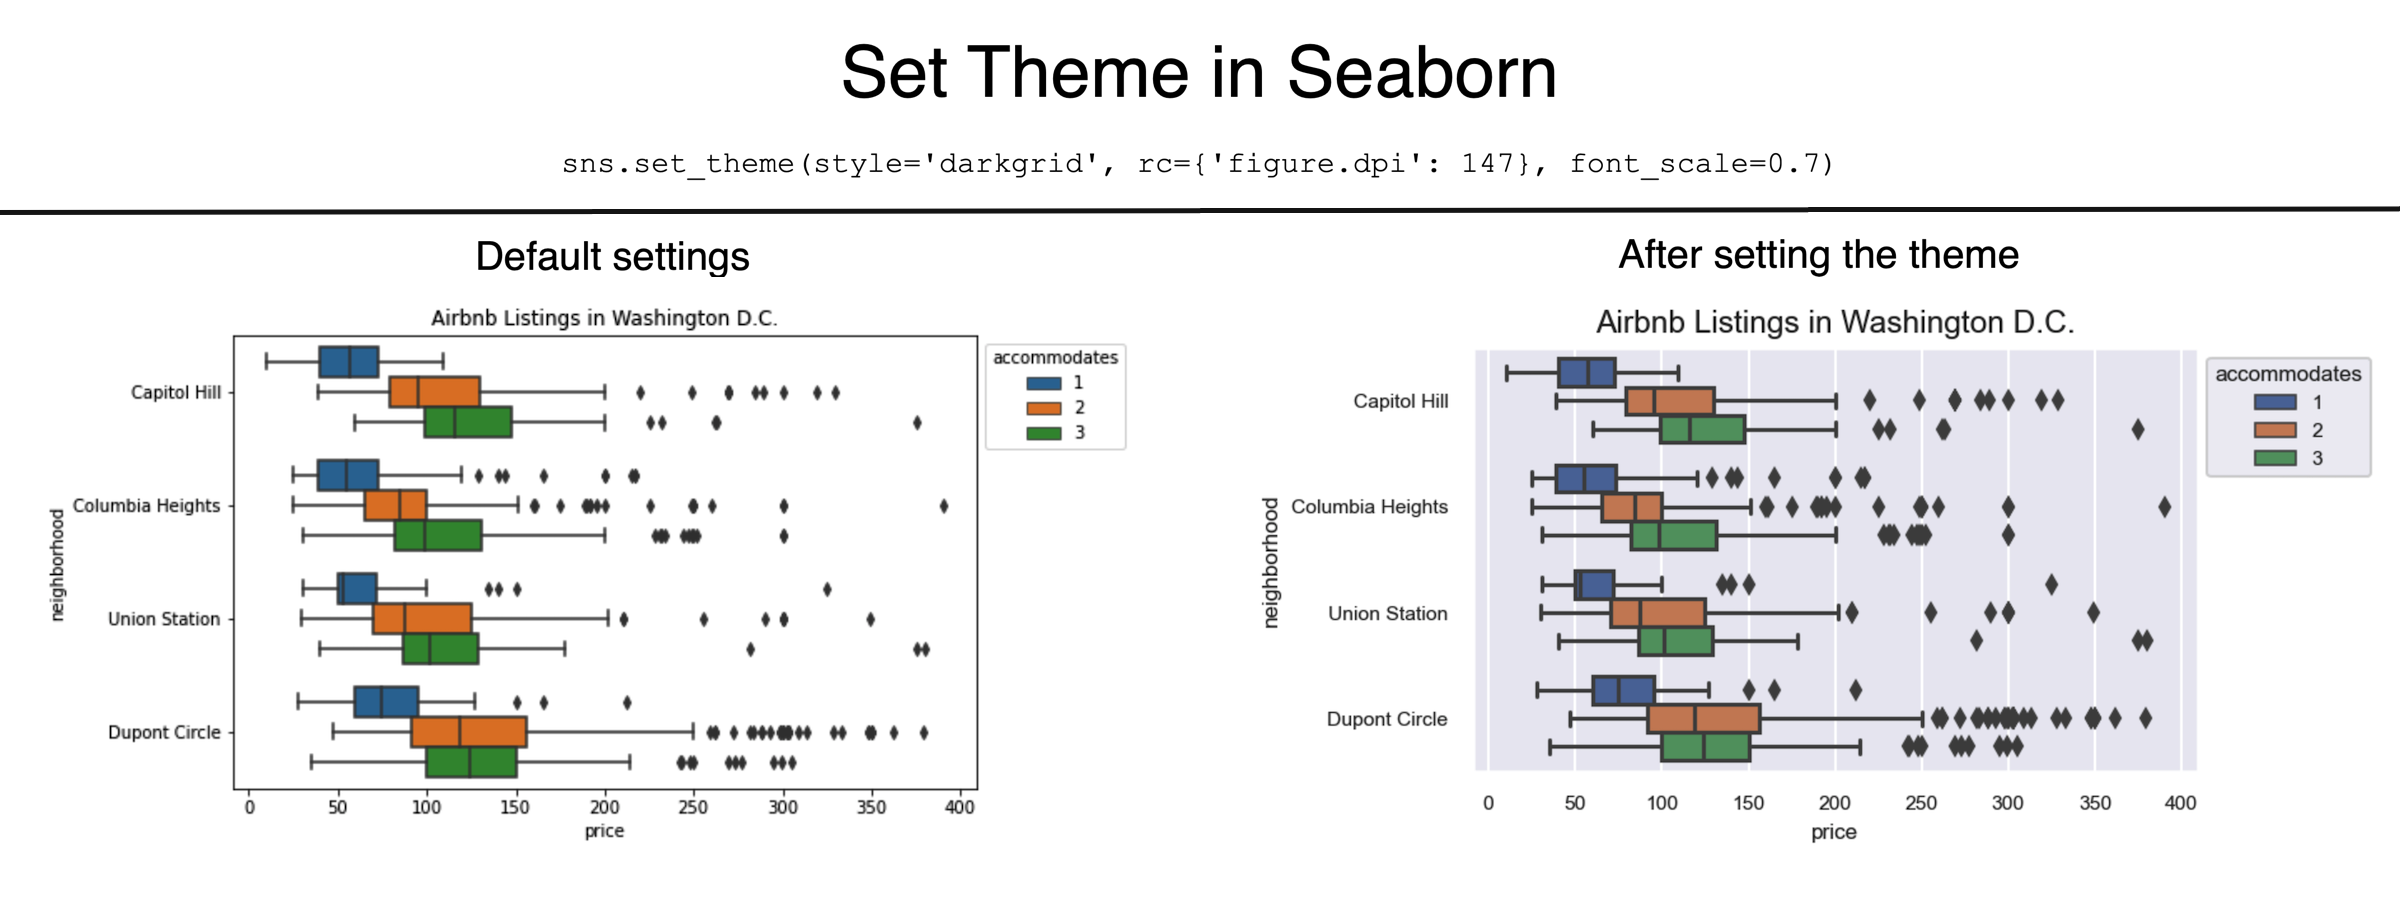

In [2]:
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147}, font_scale=0.7)

## Axes Plots

### Setting figure size with matplotlib

Unfortunately, you must use matplotlib to set the figure size. This is done using `plt.subplots` below.

## Univariate plots

* Single variable plots
* Set `x` or `y` to the plotting variable
* Setting `x` creates a horizontal plot and `y` vertical

### Box plots wit the `boxplot` function

* Visualize distribution of numeric data
* Box spans the 1st to 3rd quartile
* Line in box is the median
* Whiskers extend out to 1.5 times the interquartile range
* Fliers are individual points plotted outside of whiskers

`boxplot` function is in **categorical** section of Seaborn API, but is a distribution plot

### Horizontal

### Vertical

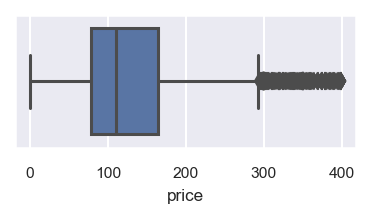

In [3]:
fig, ax = plt.subplots(figsize=(3, 1.2))
sns.boxplot(x='price', data=airbnb, ax=ax);

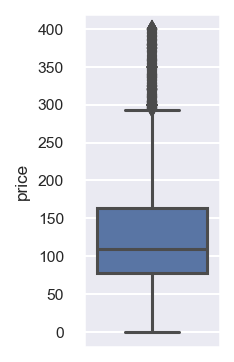

In [4]:
fig, ax = plt.subplots(figsize=(1.2, 3))
sns.boxplot(y='price', data=airbnb, ax=ax);

### Automatically split by categorical variable

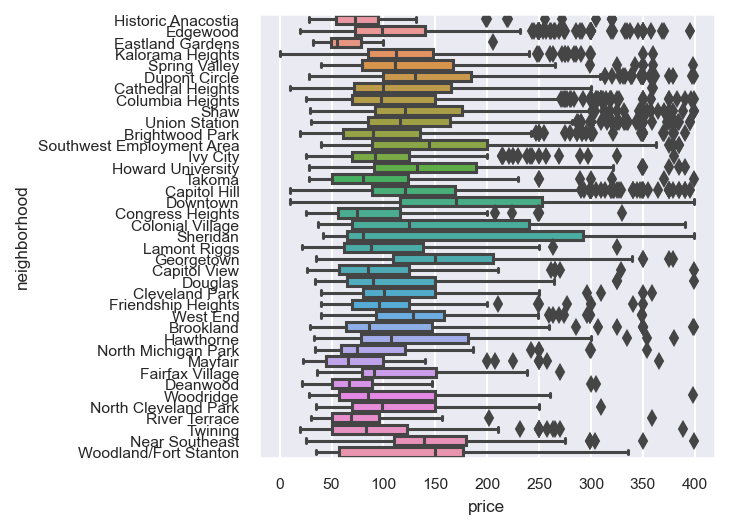

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='price', y='neighborhood', data=airbnb);

### Specify categories with `order`

Set `order` to a list of specific categories to both filter the data and sort their appearance

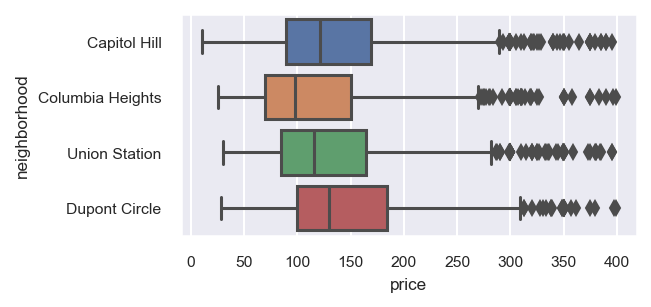

In [6]:
top4 = airbnb['neighborhood'].value_counts().index[:4]
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(x='price', y='neighborhood', data=airbnb, order=top4, ax=ax);

### Set `y` to numeric column to make vertical plot

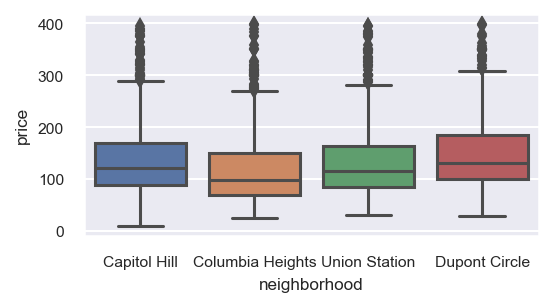

In [7]:
top4 = airbnb['neighborhood'].value_counts().index[:4]
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(x='neighborhood', y='price', data=airbnb, order=top4, ax=ax);

### When both `x` and `y` are numeric

When both `x` and `y` are numeric, Seaborn chooses `x` as the categorical. Force `y` to be categorical by setting `orient` to `h`.

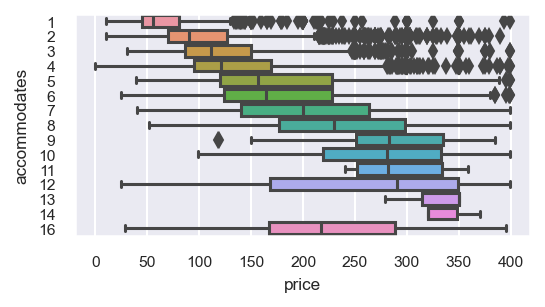

In [8]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(x='price', y='accommodates', data=airbnb, orient='h', ax=ax);

### Further split within each category by setting `hue` to a categorical column

* Use `hue_order` to both filter and set specific order
* Must use matplotlib axes object to move legend

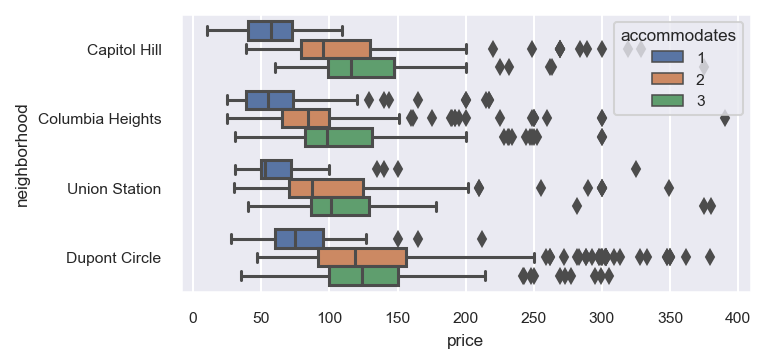

In [9]:
top4 = airbnb['neighborhood'].value_counts().index[:4]
fig, ax = plt.subplots(figsize=(5, 2.5))
ax = sns.boxplot(x='price', y='neighborhood', data=airbnb, order=top4,
                 hue='accommodates', hue_order = [1, 2, 3]);

### Move the legend with `sns.move_legend` function

* Pass the Axes or Grid as the first argument and set `loc` to one of upper/center/lower + right/left

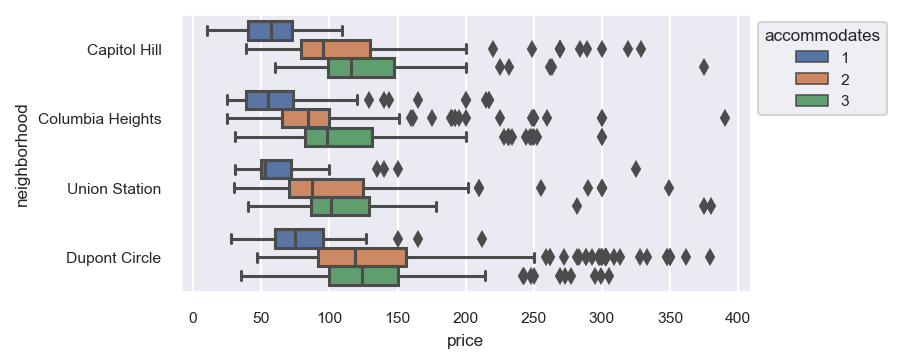

In [10]:
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left')
ax.figure

### Other `boxplot` keyword arguments

* All keyword arguments available to the matplotlib `boxplot` function are available
* Below, the whiskers span from the 1st to 99th percentile, the box heights shrunk, and the markers for the fliers changed to stars

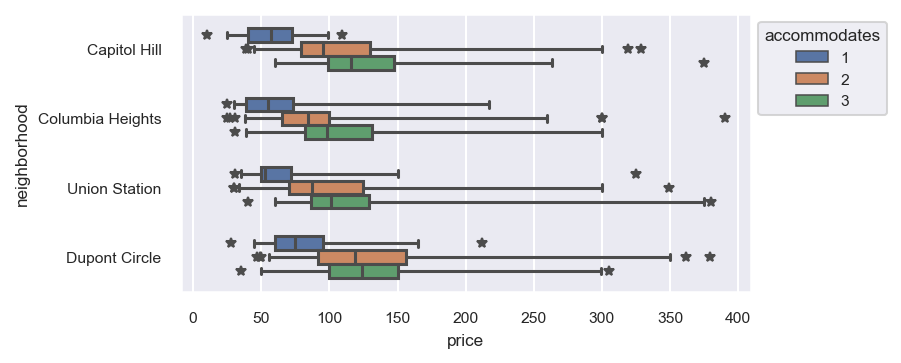

In [11]:
top4 = airbnb['neighborhood'].value_counts().index[:4]
fig, ax = plt.subplots(figsize=(5, 2.5))
ax = sns.boxplot(x='price', y='neighborhood', data=airbnb, order=top4,
                 hue='accommodates', hue_order = [1, 2, 3], 
                 whis=(1, 99), width=0.6, flierprops={'marker': '*'})
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');

## Histograms and KDEs 


### Histograms with `histplot` and `kdeplot`

* Histograms show the counts of numeric values within a specific as bars on the graph
* Can modify to show percentage
* Use the `histplot` function under the **distribution** plots

### Univariate histograms

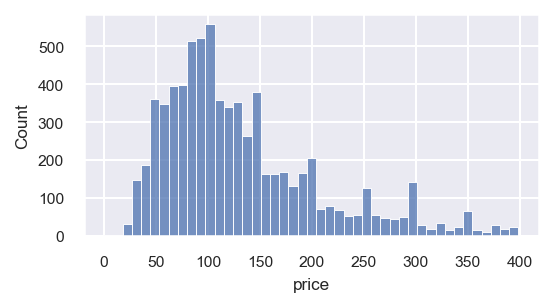

In [12]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(x='price', data=airbnb);

Bins and bin widths are calculated automatically. Set a specific number with `bins`.

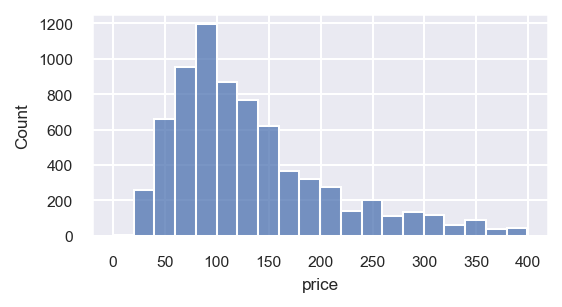

In [13]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(x='price', data=airbnb, bins=20);

Set a specific bin width with `binwidth`.

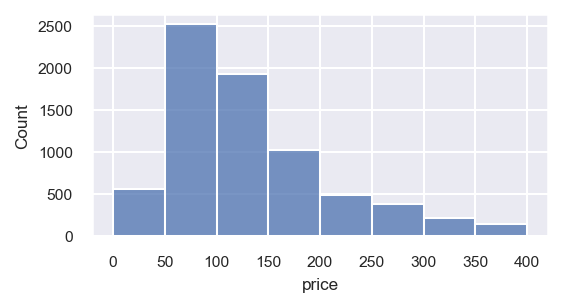

In [14]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(x='price', data=airbnb, binwidth=50);

Have the bars show percent instead of raw count with `stat`.

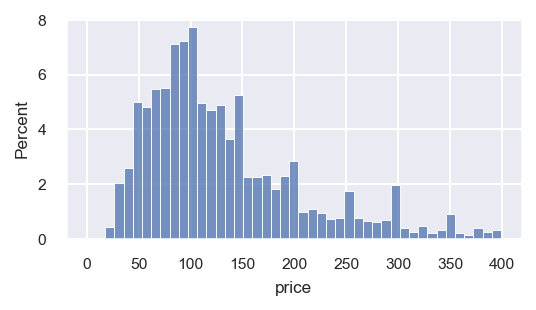

In [15]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(x='price', data=airbnb, stat='percent');

Show the cumulative count and only show the tops of the bars.

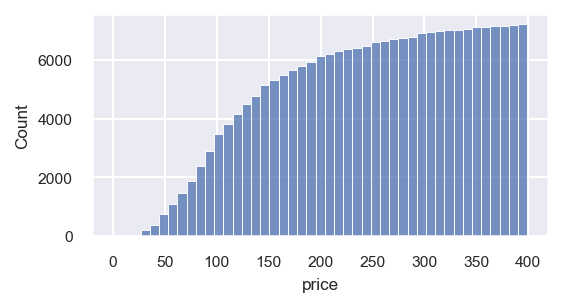

In [16]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(x='price', data=airbnb, cumulative=True);

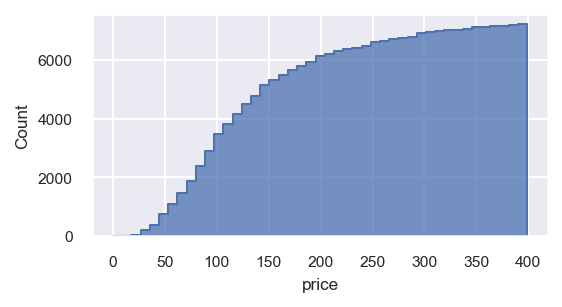

In [17]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(x='price', data=airbnb, 
             cumulative=True, element='step');

Split by category and create multiple histograms by setting `hue` (and not `y`). Use `multiple` to help customize view when graphing multiple histograms simultaneously. Again, use `hue_order` to filter and order `hue` categories.

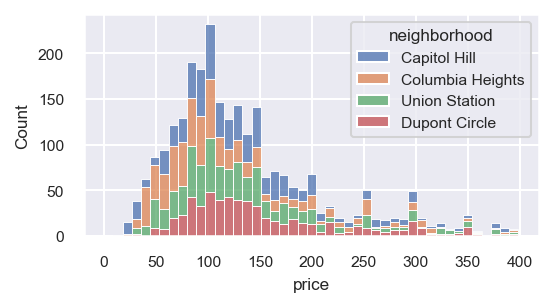

In [18]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(x='price', data=airbnb, 
             hue='neighborhood', hue_order=top4, 
             multiple='stack');

### KDEs - Kernel Density Plots with `kdeplot`

* KDEs plot an estimate of the probability distribution of a numeric variable
* Area under the curve equals 1

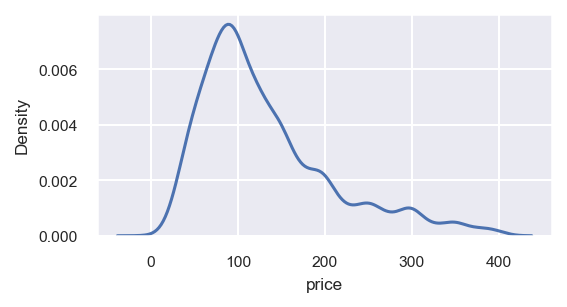

In [19]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.kdeplot(x='price', data=airbnb);

Split into categories with `hue` and filter with `hue_order`.

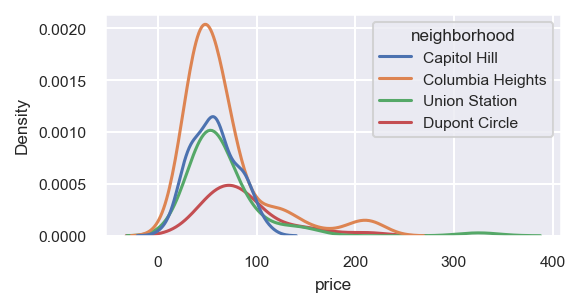

In [20]:
fig, ax = plt.subplots(figsize=(4, 2))
data = airbnb.query('accommodates == 1')
sns.kdeplot(x='price', data=data, hue='neighborhood', hue_order=top4);

Make each KDE independent of the others by setting `common_norm` to `False`.

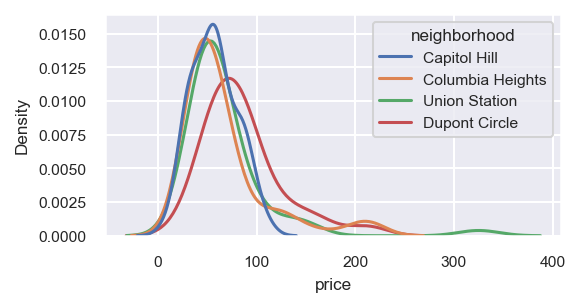

In [21]:
fig, ax = plt.subplots(figsize=(4, 2))
data = airbnb.query('accommodates == 1')
sns.kdeplot(x='price', data=data, hue='neighborhood', hue_order=top4, common_norm=False);

### Violin plots with `violinplot`

Violin plots create the same KDE as above, but duplicate it on both sides of the axis.

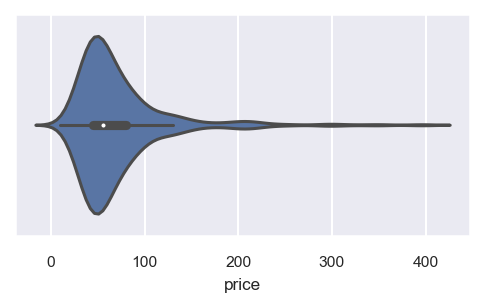

In [22]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.violinplot(x='price', data=data);

The `violinplot` function operates similarly as `boxplot`. Set `y` to a categorical column to split the data. Use `order` to filter.

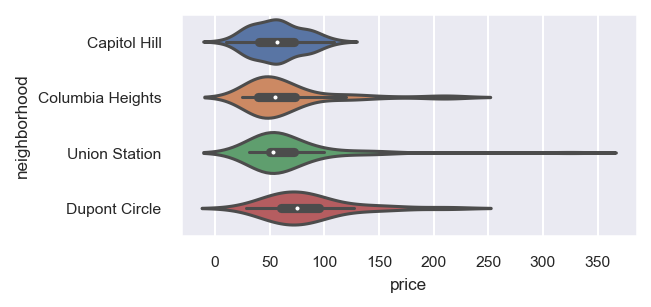

In [23]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.violinplot(x='price', y='neighborhood', data=data, order=top4);

Split further by setting `hue` to another categorical variable.

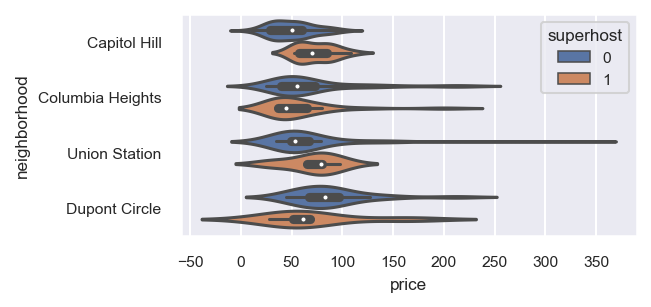

In [24]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.violinplot(x='price', y='neighborhood', data=data, order=top4, hue='superhost');

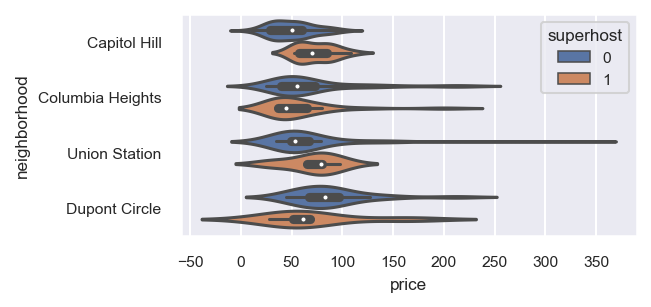

In [25]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.violinplot(x='price', y='neighborhood', data=data, order=top4, hue='superhost');

### Use `split=True`  if there are exactly two `hue` categories

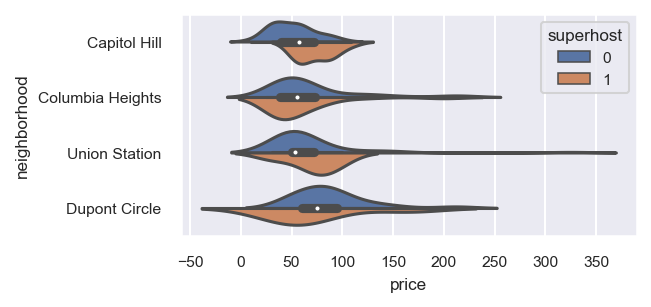

In [26]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.violinplot(x='price', y='neighborhood', data=data, order=top4, 
               hue='superhost', split=True, ax=ax);

## Grouping and Aggregating Functions

All functions above (`boxplot`, `violinplot`, `histplot`, `kdeplot`) plot distributions of numeric variables in different ways. The next sequence of functions (`barplot`, `pointplot`, and `countplot`) perform an aggregation - summarize a numeric column by a single statistic (mean, median, min, max, etc...). Set either `x` or `y` to the numeric column you'd like to aggregate and the other to the categorical column used to group. Here, we group by neighborhood taking the average (default) price of each group.

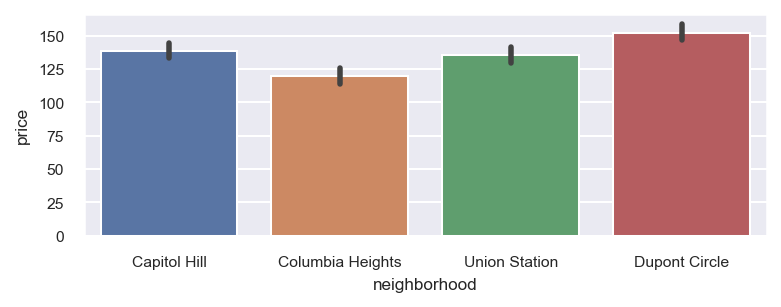

In [27]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.barplot(x='neighborhood', y='price', data=airbnb, ax=ax, order=top4);

Change orientation:

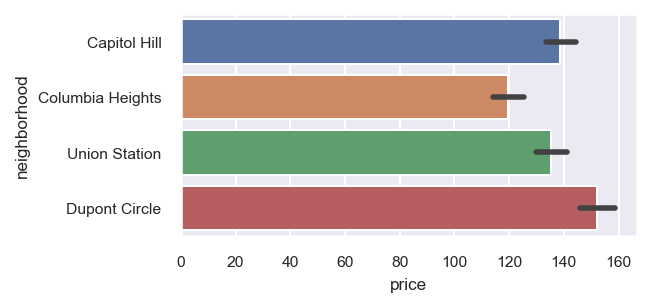

In [28]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(x='price', y='neighborhood', data=airbnb, ax=ax, order=top4);

### Change aggregation by setting `estimator`

Set `estimator` to numpy aggregation function.

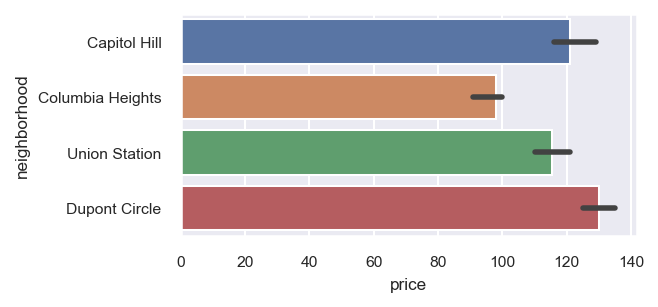

In [29]:
import numpy as np
fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(x='price', y='neighborhood', data=airbnb, ax=ax, 
            order=top4, estimator=np.median);

### Change/remove confidence interval

The 95% confidence interval of the aggregated value is calculated via bootstrapping (random resampling of the data). Set `ci` to a number to change this interval or to `None` to remove it.

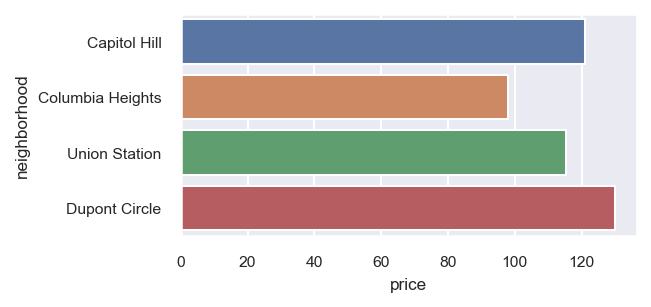

In [30]:
import numpy as np
fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(x='price', y='neighborhood', data=airbnb, ax=ax, 
            order=top4, estimator=np.median, ci=None);

### Split further with `hue`

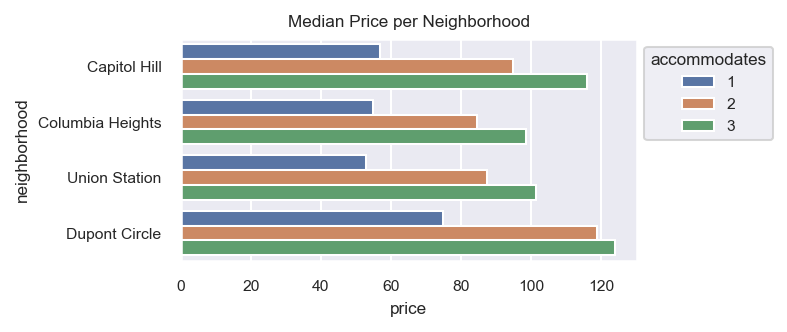

In [31]:
import numpy as np
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_title('Median Price per Neighborhood')
sns.barplot(x='price', y='neighborhood', data=airbnb, ax=ax, 
            order=top4, estimator=np.median, ci=None,
            hue='accommodates', hue_order=[1, 2, 3])
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');

### Plotting points instead of bars with `pointplot`

The `pointplot` function is similar to `barplot`, but plots the aggregated statistic as a point instead of a bar.

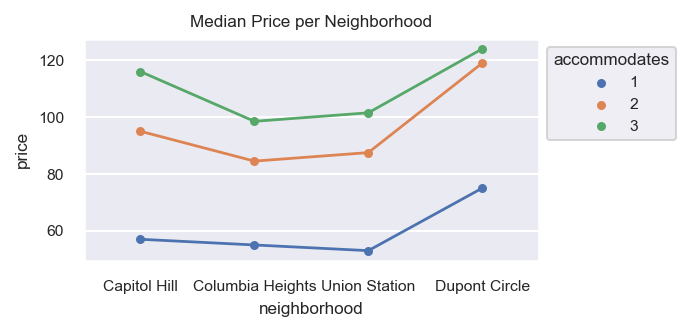

In [32]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_title('Median Price per Neighborhood')
sns.pointplot(x='neighborhood', y='price', data=airbnb, ax=ax, 
            order=top4, estimator=np.median, ci=None,
            hue='accommodates', hue_order=[1, 2, 3], scale=0.5)
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');

### Wrap text

Seaborn does not wrap text labels.

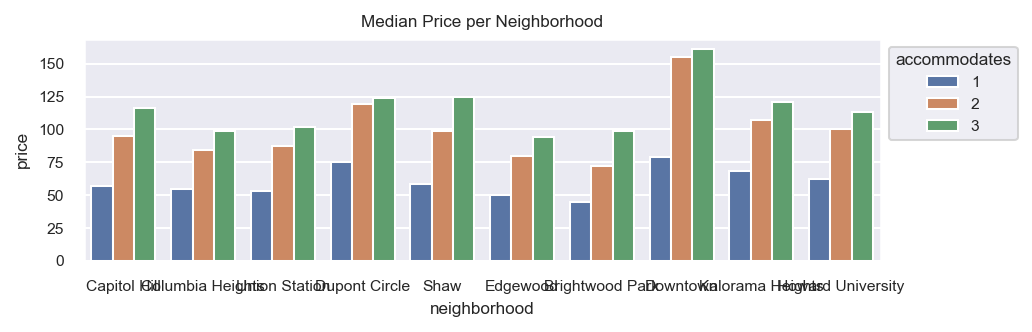

In [33]:
fig, ax = plt.subplots(figsize=(7, 2))
top10 = airbnb['neighborhood'].value_counts().index[:10]
ax.set_title('Median Price per Neighborhood')
sns.barplot(x='neighborhood', y='price', data=airbnb, ax=ax, 
            order=top10, estimator=np.median, ci=None, 
            hue='accommodates', hue_order=[1, 2, 3])
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');

Must define custom function to wrap text labels.

In [34]:
import textwrap
def wrap_labels(ax, width):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=False))
    ax.set_xticklabels(labels, rotation=0)

Wrap labels and output figure.

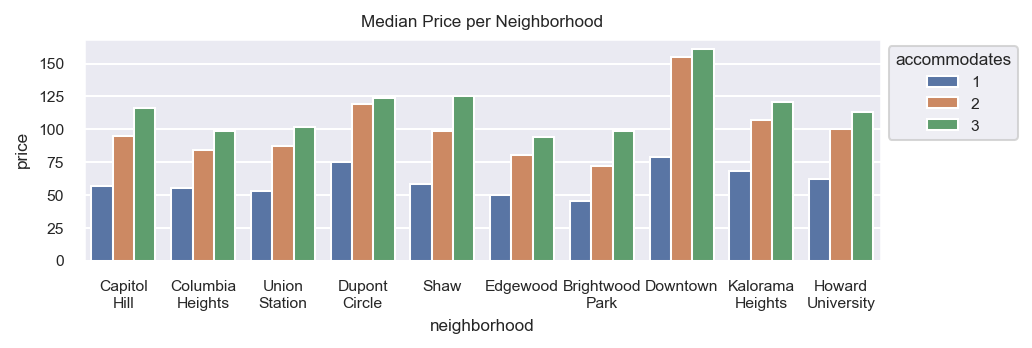

In [35]:
wrap_labels(ax, 10)
ax.figure

### `countplot` is a special case of `barplot` - only aggregation is `count`

The `countplot` function returns the raw count of each unique category. Only `x` or `y` can be set, but not both as there is no numeric column to aggregate.

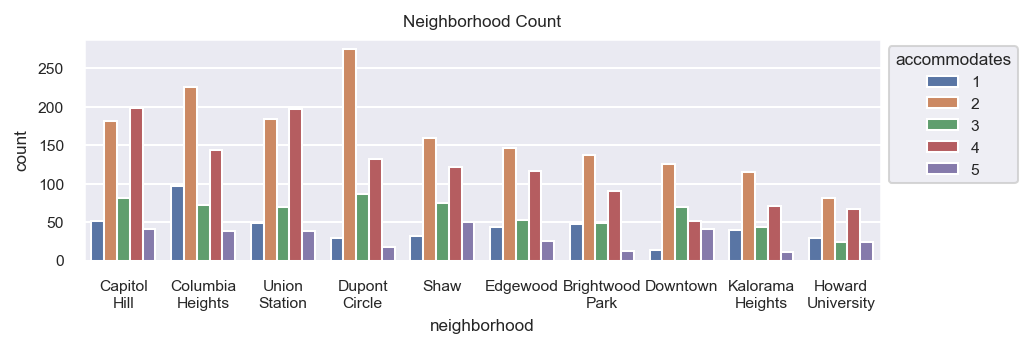

In [36]:
fig, ax = plt.subplots(figsize=(7, 2))
top10 = airbnb['neighborhood'].value_counts().index[:10]
ax.set_title('Neighborhood Count')
sns.countplot(x='neighborhood', data=airbnb, ax=ax, 
              order=top10, hue='accommodates', hue_order=[1, 2, 3, 4, 5])
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');
wrap_labels(ax, 10)

## Raw data plots

Scatter, line, and regression plots - `scatterplot`, `lineplot`, `regplot`

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

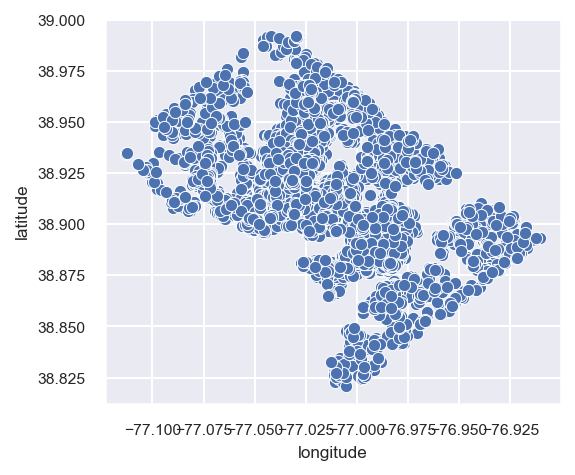

In [37]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect('equal')
sns.scatterplot(x='longitude', y='latitude', data=airbnb)

Split and color by `hue`

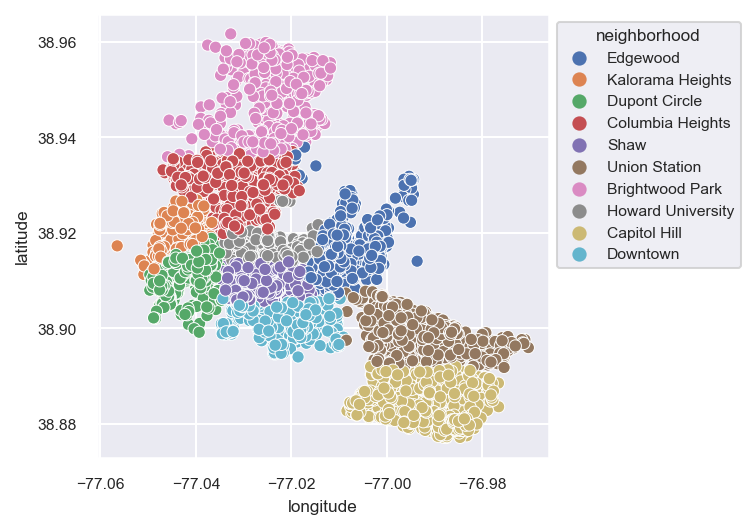

In [38]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect('equal')
data = airbnb.query('neighborhood in @top10')
sns.scatterplot(x='longitude', y='latitude', data=data, hue='neighborhood', ax=ax)
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');

Color by numeric variable

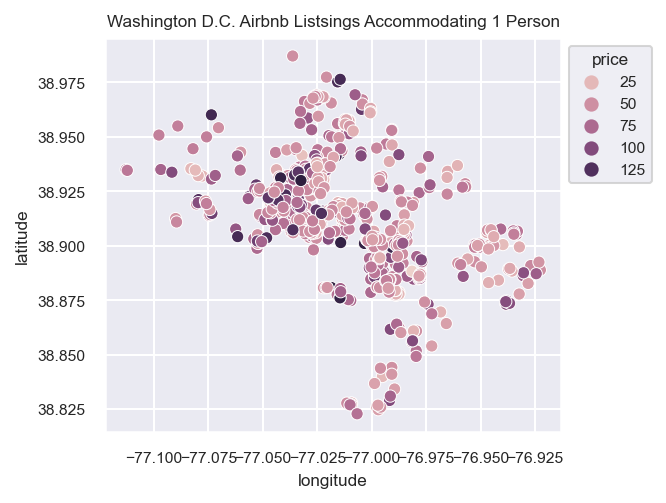

In [39]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect('equal')
data = airbnb.query('accommodates == 1 and price < 150')
sns.scatterplot(x='longitude', y='latitude', data=data, hue='price', ax=ax)
ax.set_title('Washington D.C. Airbnb Listsings Accommodating 1 Person')
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');

Size and style by other columns

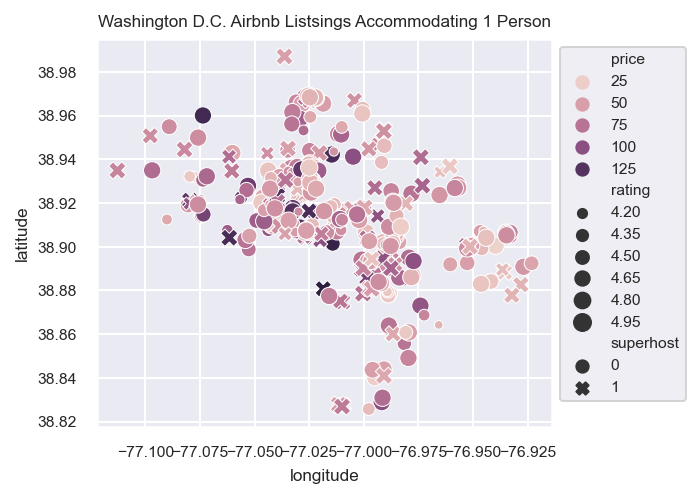

In [40]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect('equal')
data = airbnb.query('accommodates == 1 and price < 150 and rating > 4')
sns.scatterplot(x='longitude', y='latitude', data=data, hue='price', ax=ax, 
                size='rating', style='superhost')
ax.set_title('Washington D.C. Airbnb Listsings Accommodating 1 Person')
sns.move_legend(ax, bbox_to_anchor=(1, 1), loc='upper left');

## Line plots

Good for time series plots

In [41]:
covid = pd.read_csv('../data/covid.csv', parse_dates=['date'])
covid.head()

,group,date,area,Daily Deaths,Daily Cases,Deaths,Cases
0,usa,2020-01-22,Alabama,0,0,0,0
1,usa,2020-01-22,Alaska,0,0,0,0
2,usa,2020-01-22,American Samoa,0,0,0,0
3,usa,2020-01-22,Arizona,0,0,0,0
4,usa,2020-01-22,Arkansas,0,0,0,0


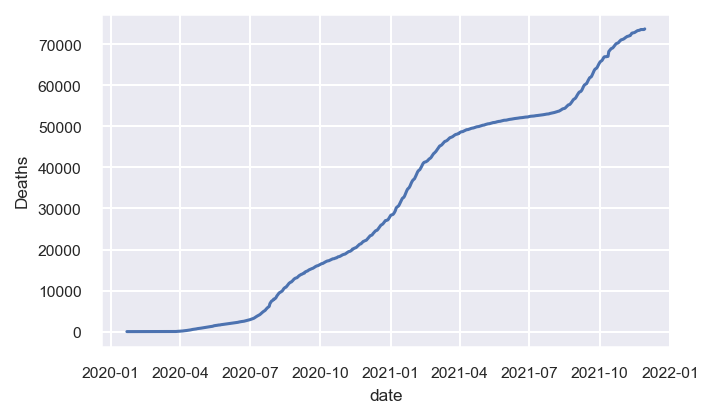

In [42]:
fig, ax = plt.subplots(figsize=(5, 3))
data = covid.query('area == "Texas"')
sns.lineplot(x='date', y='Deaths', data=data, ax=ax);

Use `hue` to split by categorical column.

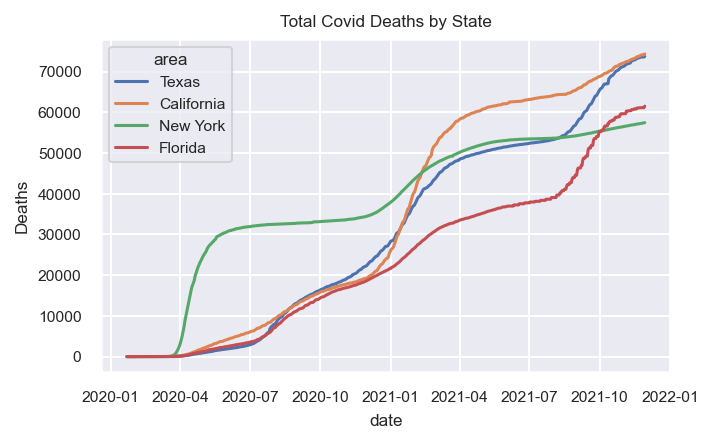

In [43]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x='date', y='Deaths', data=covid, ax=ax, hue='area', 
             hue_order=['Texas', 'California', 'New York', 'Florida'])
ax.set_title('Total Covid Deaths by State');

The `lineplot` function can group and aggregate points that have the same x value. Here, there are only two groups, "usa" and "world". All countries and and states are summed up respectively for each day.

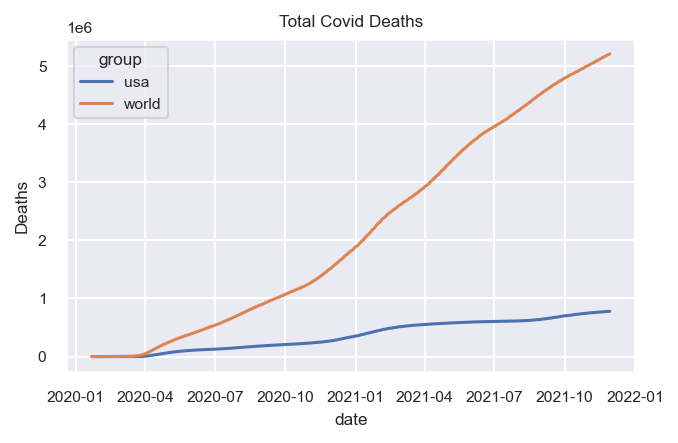

In [44]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x='date', y='Deaths', data=covid, ax=ax, hue='group', ci=None, estimator='sum')
ax.set_title('Total Covid Deaths');

### Regression plots with `regplot`

Scatterplots with regression line draw through them

In [45]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds = diamonds.sample(frac=0.2, random_state=123).query('carat < 2')
diamonds.head()

,carat,price,shape,clarity,color,cut,depth,fluorescence,lxwRatio,polish,symmetry,table
147188,1.2,10685,Round,VS2,D,Ideal,61.9,None,1.00,Excellent,Excellent,58.0
70103,0.4,883,Round,VS2,H,Ideal,62.1,None,1.01,Excellent,Excellent,56.0
82713,0.4,1124,Round,IF,F,Ideal,62.5,None,1.01,Excellent,Very Good,56.0
78685,0.4,1022,Round,VS1,E,Very Good,63.7,None,1.01,Excellent,Very Good,59.0
142722,1.0,8103,Round,VVS1,F,Very Good,64.9,None,1.01,Excellent,Very Good,58.0


In [46]:
diamonds.shape

(39607, 12)

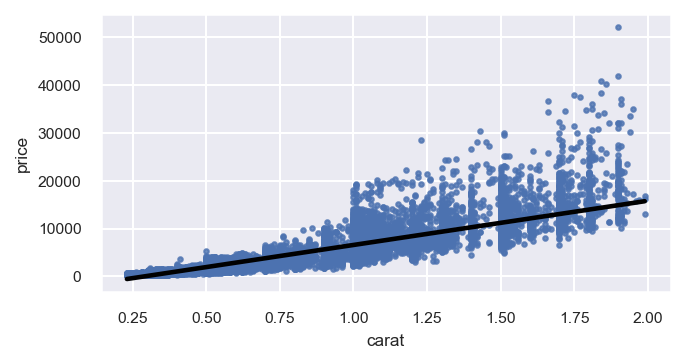

In [47]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.regplot(x='carat', y='price', data=diamonds, ax=ax, 
            scatter_kws={'s': 5}, line_kws={'color': 'black'});

Change from ordinary least squares to LOWESS.

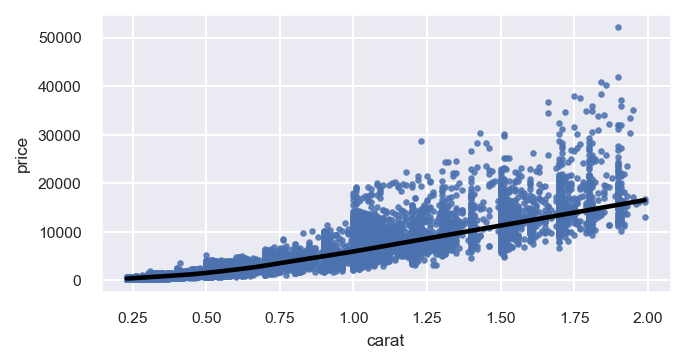

In [48]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.regplot(x='carat', y='price', data=diamonds, ax=ax, lowess=True,
            scatter_kws={'s': 5}, line_kws={'color': 'black'});

Polynomial regression by setting order to integer.

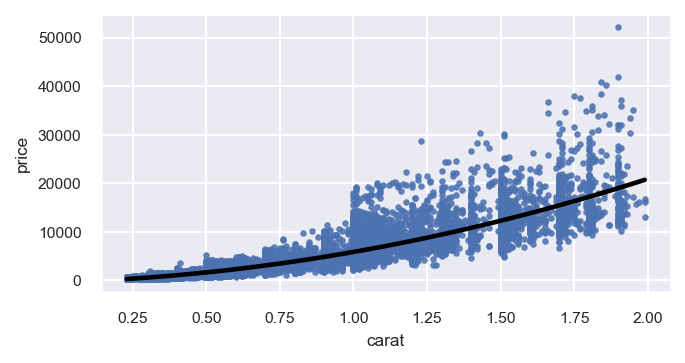

In [49]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.regplot(x='carat', y='price', data=diamonds, order=2, ax=ax,
            scatter_kws={'s': 5}, line_kws={'color': 'black'});

## Long (tidy) vs wide data

* Each variable is a column name
* Each row is an observation

All data above is tidy. Seaborn can plot wide data as well.

### Stocks dataset - wide data

In [50]:
stocks = pd.read_csv('../data/stocks.csv', index_col='date', parse_dates=['date'])
stocks.head()

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN
1999-10-28,29.01,2.43,16.59,71.00,NaN,21.19,38.85,19.79,NaN,NaN
1999-10-29,29.88,2.50,17.21,70.62,NaN,21.47,39.25,20.00,NaN,NaN


Reshape to make tidy

In [51]:
stocks_tidy = stocks.melt(ignore_index=False, var_name='stock', value_name='price')
stocks_tidy

,stock,price
date,,
1999-10-25,MSFT,29.84
1999-10-26,MSFT,29.82
1999-10-27,MSFT,29.33
1999-10-28,MSFT,29.01
1999-10-29,MSFT,29.88
...,...,...
2019-10-18,V,175.71
2019-10-21,V,176.43
2019-10-22,V,170.86


### Plotting wide data in Seaborn

Only set `data` parameter to the DataFrame. Do not set `x` or `y`. Each column will be plotted independently as the `y` values and the index used as the `x` values.

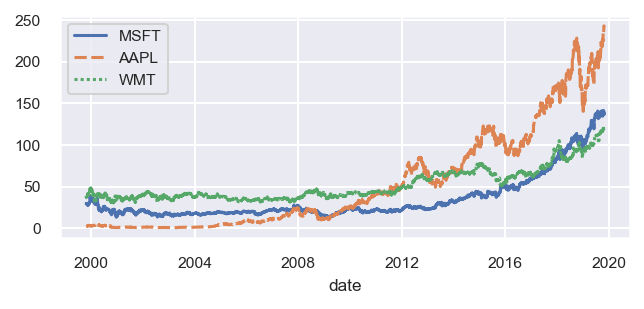

In [52]:
fig, ax = plt.subplots(figsize=(5, 2))
data = stocks[['MSFT', 'AAPL', 'WMT']]
sns.lineplot(data=data);

## Ordered Categorical Variables

By default, Seaborn plots categorical variables in the order they appear.

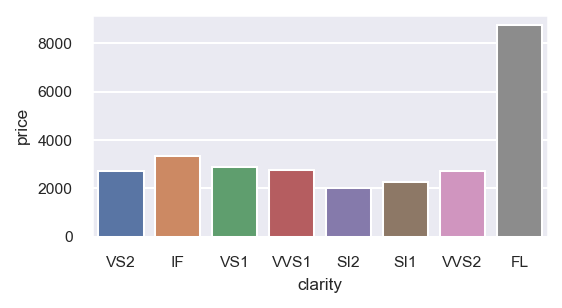

In [53]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(x='clarity', y='price', data=diamonds, ci=None, ax=ax);

Changing to ordered categorical variable will plot categories in that order.

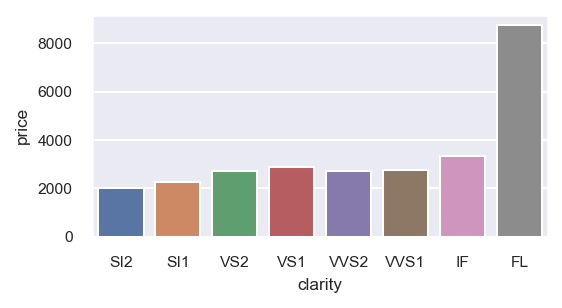

In [54]:
clarity_ord = pd.CategoricalDtype(['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL'])
color_ord = pd.CategoricalDtype(['I', 'H', 'G', 'F', 'E', 'D'])
diamonds['clarity'] = diamonds['clarity'].astype(clarity_ord)
diamonds['color'] = diamonds['color'].astype(color_ord)

fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(x='clarity', y='price', data=diamonds, ci=None, ax=ax);

## Grid Plots

* A Grid is a matplotlib Figure containing one or more Axes
    * rows and columns of plots
* Only a few Seaborn plotting functions create Grids
    * `relplot` - creates grids of scatter or line plots
    * `displot` - creates grids of histograms or KDEs
    * `catplot` - creates grids of boxplots, bars, points
    * `lmplot` - creates grids of linear regression plots
    
### How to use Grid plots 

* Use one of `relplot`, `displot`, `catplot`, or `lmplot`
* Set `kind` to the underlying Axes plot ("scatter", "line", "hist", "kde", "bar", "count", "box", "violin")
* Set `row` or `col` (or both) to a categorical column
* Set `col_wrap` to an integer to wrap the plots when only using `col` and not `row`
* Filter and set specific order with `row_order`, `col_order`
* No need to use a grid plot when creating a single Axes
* Use `height` and `aspect` to control height and width of each individual Axes
    * `height` is in figure inches of a single Axes
    * `aspect` is multiplied by `height` to get width of a single Axes
* Additional keyword arguments are forwarded to the underlying Axes plotting function

### A grid of box plots

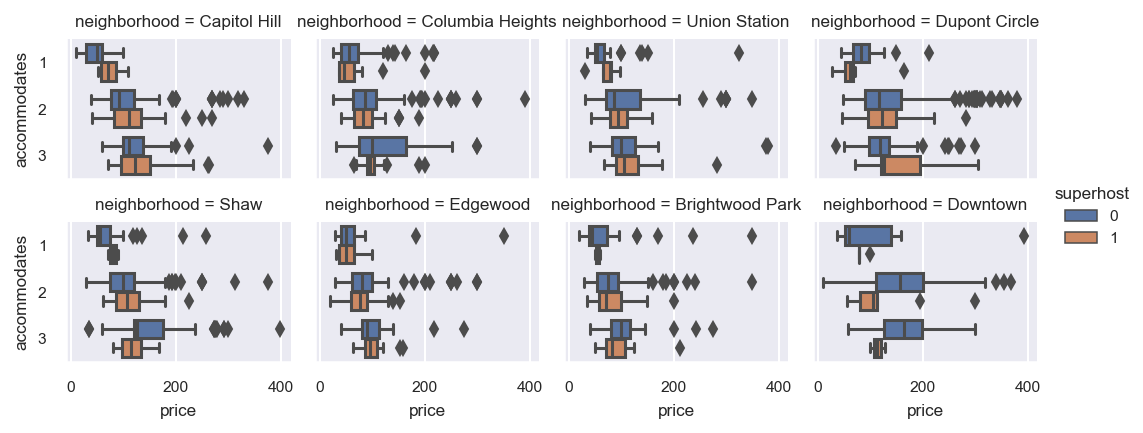

In [55]:
top8 = airbnb['neighborhood'].value_counts().index[:8]
grid = sns.catplot(x='price', y='accommodates', data=airbnb, order=[1, 2, 3],
                   col='neighborhood', col_order=top8, col_wrap=4,
                   hue='superhost', hue_order=[0, 1],
                   kind='box', orient='h', height=1.5, aspect=1.2);

Access underlying matplotlib figure with `figure` attribute. The `grid` object itself has several methods such as `set_titles` to control the individual axes titles.

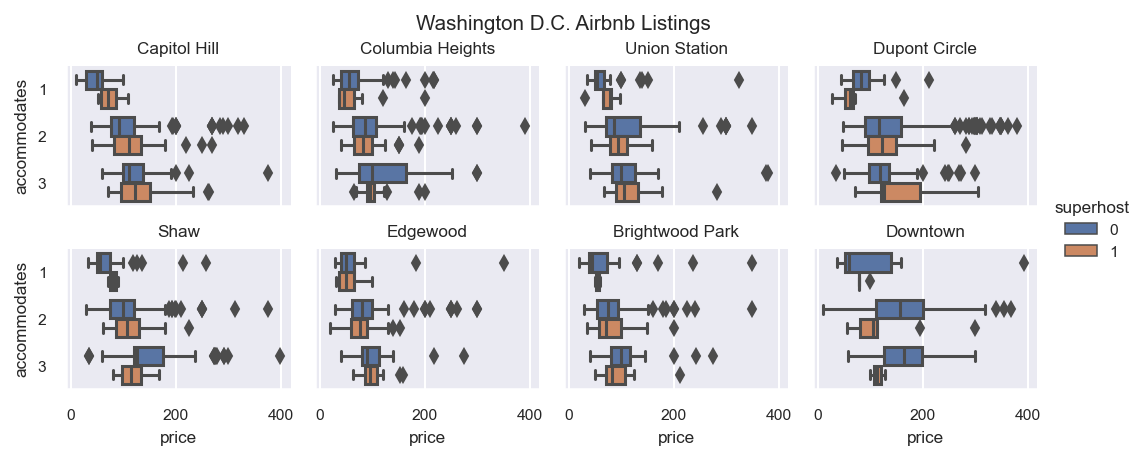

In [56]:
grid.figure.suptitle('Washington D.C. Airbnb Listings', y=1.02)
grid.set_titles('{col_name}')
grid.figure

## A grid of regression plots

Since both clarity and color are ordered categoricals, they will appear in their natural ordering.

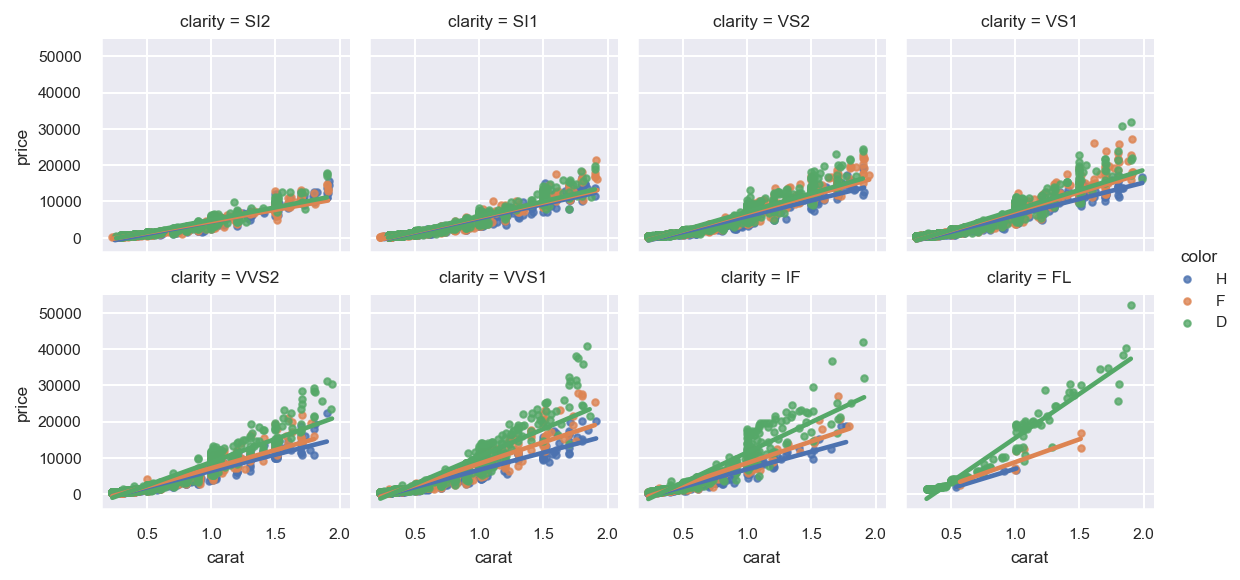

In [57]:
grid = sns.lmplot(x='carat', y='price', data=diamonds, 
                  col='clarity', col_wrap=4,
                  hue='color', hue_order=['H', 'F', 'D'],
                  height=2, scatter_kws={'s': 10}, ci=None)

## Color palettes

* Called [color maps in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
* Qualitative - coloring of categories with no inherent ordering (neighborhood, diamond shape)
* Sequential - coloring for numeric and categorical values with inherent ordering (price, carat, clarity)
* Diverging - coloring for numeric and categorical values where there is a midpoint and moving away from this midpoint in any direction makes it more extreme

### How to create and set color palettes

* View color palettes with `sns.color_palette`
* Create your own palettes with functions like `sns.husl_palette` or `sns.choose_*`
* Set `palette` parameter in seaborn plotting functions to color palette object or string name

### Sample of builtin color palettes

* Qualitative color palettes
    * Seaborn - **deep**, muted, bright, pastel, dark, colorblind
    * Matplotlib - **tab10**, Pastel1 Pastel2 Paired Accent Dark2 Set1 Set2 Set3 tab20 tab20b tab20c 
* Sequential
    * Seaborn - rocket, mako, flare, crest
    * Matplotlib - viridis, plasma, inferno, magma, cividis

In [58]:
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

Create a custom color palette

In [59]:
my_pallete = sns.husl_palette(n_colors=8, h=0.1, s=0.8, l=0.6)
my_pallete

[(0.7935766612538749, 0.487439290298928, 0.24986272219560735),
 (0.5973778168098883, 0.5704764228347583, 0.2478582025746044),
 (0.28687283385047874, 0.6335609122781161, 0.24604663810861876),
 (0.2627594544417091, 0.6186816741927241, 0.5494822206982707),
 (0.27453017679552016, 0.6039501305752224, 0.681511748527683),
 (0.45247114333205735, 0.5384898529351106, 0.9088095172456203),
 (0.881130536467345, 0.3133364868471666, 0.9068467929935901),
 (0.9270400175445286, 0.35330639324901786, 0.5922702953446376)]

Use custom color palette

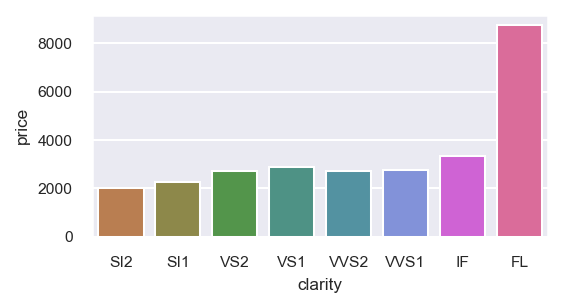

In [60]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(x='clarity', y='price', data=diamonds, ci=None, ax=ax, palette=my_pallete);